In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# 0 -> time1 -> time2 -> time3
# 1 -> power1 -> power2 -> power3
 
df1 = pd.read_csv("/home/kedar/Documents/IISc/Analytical_Modelling/data/yolo_cpu_gpu_3199_time.csv")
df2 = pd.read_csv("/home/kedar/Documents/IISc/Analytical_Modelling/data/yolo_cpu_gpu_3199_power.csv")
data = pd.read_csv("/home/kedar/Documents/IISc/Analytical_Modelling/data/merged_observed_predicted_yolo.csv")

In [8]:
data['observed_time'] = data['observed_time']/1000
data['observed_power'] = data['observed_power']
data['predicted_time'] = data['predicted_time']/1000
data['predicted_power'] = data['predicted_power']
data

,powermode,observed_time,observed_power,predicted_time,predicted_power
0,2_268800_1300500000_204000000,2.008091,15.8030,2.958958,14.210138
1,2_268800_1300500000_2133000000,1.000000,16.9200,1.920686,14.310288
2,2_268800_1300500000_3199000000,0.958299,17.4245,1.740859,14.346586
3,2_268800_1300500000_665600000,1.094487,16.6060,2.230725,14.274421
4,2_268800_1236750000_204000000,4.287385,13.3870,3.299394,14.096366
...,...,...,...,...,...
4363,12_2201600_216750000_665600000,0.817102,16.4655,1.003224,18.064133
4364,12_2201600_114750000_204000000,1.869011,15.1050,1.930854,16.437986
4365,12_2201600_114750000_2133000000,1.316470,16.7170,1.128326,15.315082
4366,12_2201600_114750000_3199000000,1.307856,17.8240,1.050727,16.996207


In [9]:
df1["observed_power"] = df2["observed_power"]
# df1["powermode"] = df2["powermode"]
df1.columns=["cpu_freq","gpu_freq","mem_freq","observed_time","observed_power"]
df1['observed_time'] = df1['observed_time']/1000
df1['observed_power'] = df1['observed_power']
df = df1
df

,cpu_freq,gpu_freq,mem_freq,observed_time,observed_power
0,268.8,114.75,3199,2.110700,13.9010
1,422.4,216.75,3199,1.269766,14.6040
2,576.0,318.75,3199,0.926013,14.7575
3,729.6,420.75,3199,0.760566,15.4100
4,883.2,522.75,3199,0.632761,15.8120
5,1036.8,624.75,3199,0.552035,15.5110
6,1190.4,726.75,3199,0.495588,16.3150
7,1344.0,828.75,3199,0.455096,16.8210
8,1497.6,930.75,3199,0.405447,17.8260
9,1497.6,828.75,3199,0.406532,18.1250


In [10]:
# print(data.head())
def is_pareto_efficient(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient


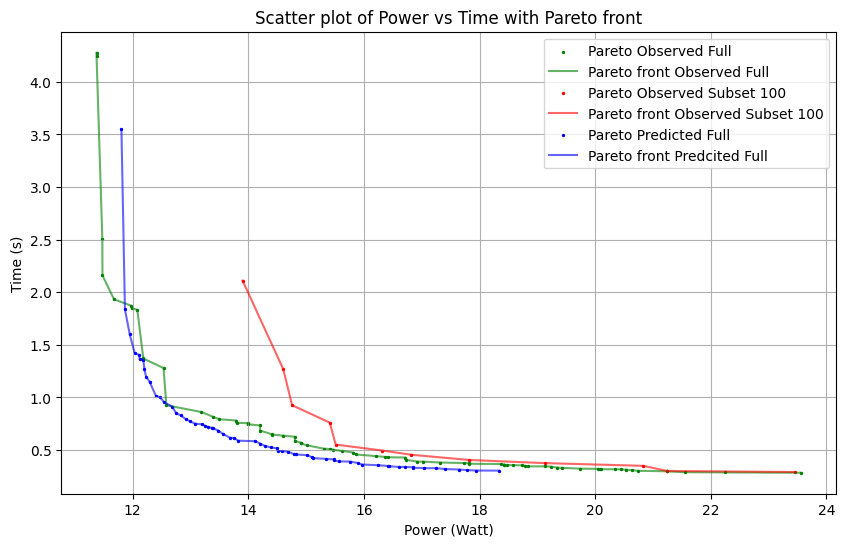

In [11]:
 
def plot_pareto_front(data, data_full):
    # Extract the relevant data
    x_obs = data_full['observed_power']
    y_obs = data_full['observed_time']
    x_obs_sub = data['observed_power']
    y_obs_sub = data['observed_time']
    x_pred = data_full['predicted_power']
    y_pred = data_full['predicted_time']
 
    # Find pareto points
    pareto_efficient_obs = is_pareto_efficient(np.array([x_obs, y_obs]).T)
    pareto_efficient_obs_sub = is_pareto_efficient(np.array([x_obs_sub, y_obs_sub]).T)
    pareto_efficient_pred = is_pareto_efficient(np.array([x_pred, y_pred]).T)
   
    # Extract Pareto points
    pareto_data_obs = data_full[pareto_efficient_obs]
    pareto_x_obs = pareto_data_obs['observed_power']
    pareto_y_obs = pareto_data_obs['observed_time']
 
    pareto_data_obs_sub = data[pareto_efficient_obs_sub]
    pareto_x_obs_sub = pareto_data_obs_sub['observed_power']
    pareto_y_obs_sub = pareto_data_obs_sub['observed_time']
 
    pareto_data_pred = data_full[pareto_efficient_pred]
    pareto_x_pred = pareto_data_pred['predicted_power']
    pareto_y_pred = pareto_data_pred['predicted_time']
   
    # Sort Pareto points by x-values (Energy)
    sorted_indices_obs = np.argsort(pareto_x_obs)
    sorted_pareto_x_obs = pareto_x_obs.iloc[sorted_indices_obs].values
    sorted_pareto_y_obs = pareto_y_obs.iloc[sorted_indices_obs].values
 
    sorted_indices_obs_sub = np.argsort(pareto_x_obs_sub)
    sorted_pareto_x_obs_sub = pareto_x_obs_sub.iloc[sorted_indices_obs_sub].values
    sorted_pareto_y_obs_sub = pareto_y_obs_sub.iloc[sorted_indices_obs_sub].values
 
    sorted_indices_pred = np.argsort(pareto_x_pred)
    sorted_pareto_x_pred = pareto_x_pred.iloc[sorted_indices_pred].values
    sorted_pareto_y_pred = pareto_y_pred.iloc[sorted_indices_pred].values
 
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    # plt.scatter(x_obs, y_obs, s=2, label='Observed Full points', color='red')
    # plt.scatter(x_pred, y_pred, s=2, label='Observed 100 Sampled points', color='blue')
    plt.scatter(sorted_pareto_x_obs, sorted_pareto_y_obs, color='green', s=2, label='Pareto Observed Full')
    plt.plot(sorted_pareto_x_obs, sorted_pareto_y_obs, color='green', label='Pareto front Observed Full', alpha=0.6)
    plt.scatter(sorted_pareto_x_obs_sub, sorted_pareto_y_obs_sub, color='red', s=2, label='Pareto Observed Subset 100')
    plt.plot(sorted_pareto_x_obs_sub, sorted_pareto_y_obs_sub, color='red', label='Pareto front Observed Subset 100', alpha=0.6)
    plt.scatter(sorted_pareto_x_pred, sorted_pareto_y_pred, color='blue', s=2, label='Pareto Predicted Full')
    plt.plot(sorted_pareto_x_pred, sorted_pareto_y_pred, color='blue', label='Pareto front Predcited Full', alpha=0.6)
   
   
    plt.xlabel('Power (Watt)')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.title('Scatter plot of Power vs Time with Pareto front')
    plt.grid(True)
    plt.show()
 
 
plot_pareto_front(df, data)